In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor     

#### Exploratory Data Analysis

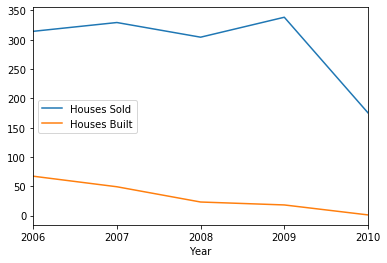

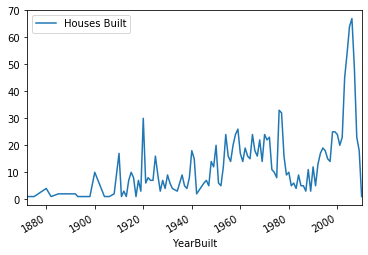

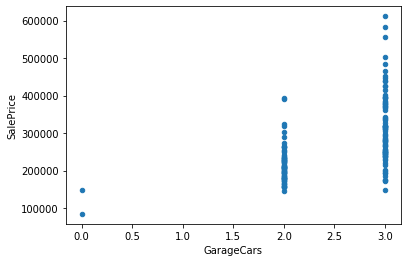

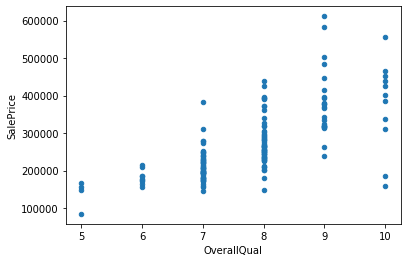

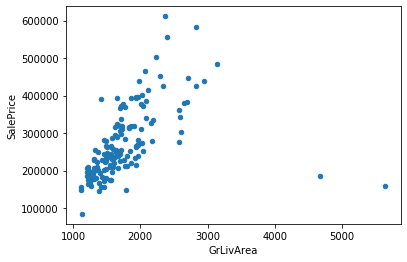

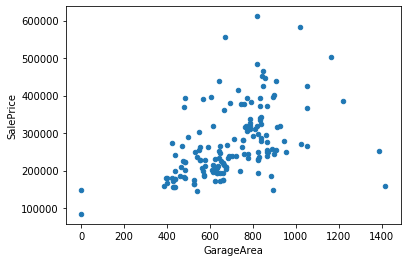

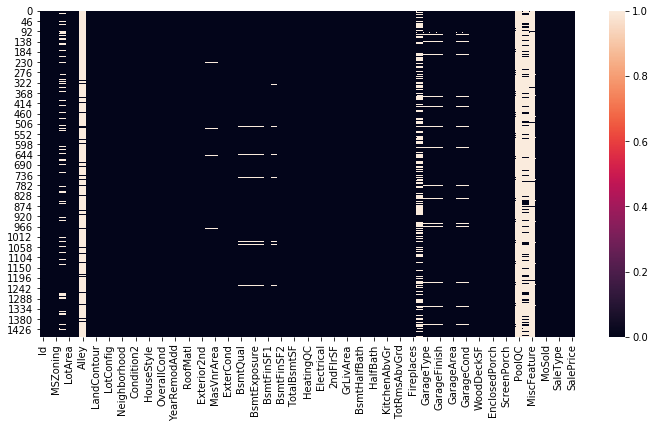

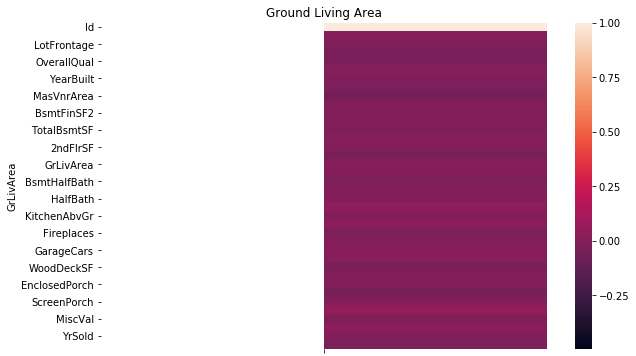

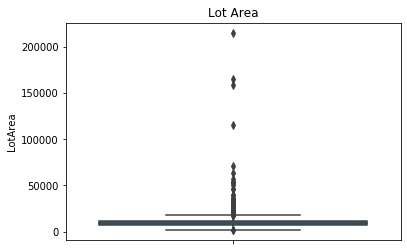

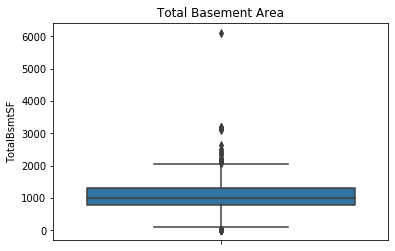

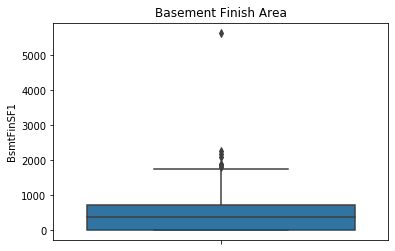

In [3]:
# author : Supraja
df = pd.read_csv('./train.csv')
df_yrb = df.loc[df['YearBuilt'] > 2005]
df_yrgrp = df_yrb.groupby(['YearBuilt']).size().reset_index(name='Houses Built')
df_yrsld =df.groupby(['YrSold']).size().reset_index(name='Houses Sold')
df_sold_built = pd.concat([df_yrgrp, df_yrsld], axis = 1)
df_sold_built.rename(columns={'YrSold': 'Year'}, inplace=True)
df_sold_built['Year'] = pd.to_datetime(df_sold_built['Year'], format='%Y')

# plotting House count with resect to Year built and Year Sold between 2006-2010
df_sold_built.plot(x ='Year', y=['Houses Sold', 'Houses Built'], kind = 'line')

df_yrblt = df.groupby(['YearBuilt']).size().reset_index(name='Houses Built')
df_yrblt['YearBuilt'] = pd.to_datetime(df_yrblt['YearBuilt'], format='%Y')

# Plotting house count with respect to year built between 1880-2010
df_yrblt.plot(x ='YearBuilt', y='Houses Built', kind = 'line')

#Scatter plots for Correlation of features with Sale Price

df1 = df.loc[df['YearBuilt'] > 2005]
df1.plot(x ='GarageCars', y='SalePrice', kind = 'scatter')
df1.plot(x ='OverallQual', y='SalePrice', kind = 'scatter')
df1.plot(x ='GrLivArea', y='SalePrice', kind = 'scatter')
df1.plot(x ='GarageArea', y='SalePrice', kind = 'scatter')



# Heatmap of Null Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

# Heatmap for Correlation
corr = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr)

# Box plots to check outliers
sns.boxplot( y=df["GrLivArea"] );
plt.title("Ground Living Area")
plt.show()

sns.boxplot(y=df["LotArea"] );
plt.title("Lot Area")
plt.show()

sns.boxplot(y=df["TotalBsmtSF"] );
plt.title("Total Basement Area")
plt.show()

sns.boxplot(y=df["BsmtFinSF1"] );
plt.title("Basement Finish Area")
plt.show()


# Preprocessing Class

In [17]:
class Preprocessing:
    def read_csv(self,path):
        df = pd.read_csv(path)
        df_original = df.copy()
        return df_original
    def random_forest(self, test_df, train_df, y_train):
        rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
        rf.fit(train_df, y_train)
        test_df = self.compare_match(test_df, train_df)
        predictions = rf.predict(test_df)
        return np.expm1(predictions)
    def get_cat_df(self, df):
        cat_df = df[df.select_dtypes(include='object').columns.tolist()]
        return cat_df
    def get_cont_df(self, df):
        cont_cols = df.describe().columns
        cont_df = df[cont_cols]
        return cont_df
    
    def fill_na(self, cat_df, model):
        
        #Dealing with ordinal data(making them continous)
        
        #scale_mapper_LotShape
        scale_mapper_LotShape = {'Reg':4, 'IR1':3,'IR2':2,'IR3':1}
        cat_df['LotShape'] = cat_df['LotShape'].replace(scale_mapper_LotShape)
        cat_df.LotShape.unique()
        
        #scale_mapper_Alley
        scale_mapper_Alley={'Pave':2,'Grvl':1}
        cat_df['Alley'] = cat_df['Alley'].replace(scale_mapper_Alley)
        cat_df['Alley'] = cat_df['Alley'].fillna(value=0).astype(int)
        cat_df.Alley.unique()
        
        if model != 'xg':
           #scale_mapper_Street
            scale_mapper_Street={'Pave':2,'Grvl':1}
            cat_df.Street=cat_df.Street.replace(scale_mapper_Street)
            cat_df.Street.unique()
        
        #scale_mapper_common
        scale_mapper_common = {'Po':1, 'Fa':2, 'TA':3,'Gd':4,'Ex':5}
        col_list=['KitchenQual','ExterCond','BsmtQual','BsmtCond','HeatingQC']
        for col in col_list:
            cat_df[col] = cat_df[col].replace(scale_mapper_common)
        cat_df['BsmtCond'] = cat_df['BsmtCond'].fillna(value=0)
        cat_df['BsmtQual'] = cat_df['BsmtQual'].fillna(value=0).astype(int)
        
        if model != 'xg':
           #scale_mapper_Utilities
            scale_mapper_Utilities={'AllPub':2,'NoSeWa':1,}
            cat_df.Utilities=cat_df.Utilities.replace(scale_mapper_Utilities)
            cat_df.Utilities.unique()

           #scale_mapper_LandSlope
            scale_mapper_LandSlope={'Gtl':3,'Mod':2,'Sev':1}
            cat_df.LandSlope=cat_df.LandSlope.replace(scale_mapper_LandSlope)
            cat_df.LandSlope.unique()
        
        #scale_mapper_BsmtExposure
        scale_mapper_BsmtExposure={'Gd':4,'Av':3,'Mn':2,'No':1}
        cat_df.BsmtExposure=cat_df.BsmtExposure.replace(scale_mapper_BsmtExposure)
        cat_df['BsmtExposure'] = cat_df['BsmtExposure'].fillna(value=0).astype(int)
        cat_df.BsmtExposure.unique()
        
        #scale_mapper_BsmtFinType
        scale_mapper_BsmtFinType = {'GLQ':6, 'ALQ':5, 'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}
        col_list=['BsmtFinType1','BsmtFinType2']
        for col in col_list:
            cat_df[col] = cat_df[col].replace(scale_mapper_BsmtFinType)
        cat_df['BsmtFinType1'] = cat_df['BsmtFinType1'].fillna(value=0).astype(int)
        cat_df['BsmtFinType2'] = cat_df['BsmtFinType2'].fillna(value=0).astype(int)
            
        #scale_mapper_Functional
        scale_mapper_Functional={'Typ':8,'Min1':7,'Min2':6, 'Mod':5, 'Maj1':4,'Maj2':3,'Sev':2,'Sal':1}
        cat_df.Functional=cat_df.Functional.replace(scale_mapper_Functional)
        cat_df.Functional.unique()
        
        #scale_mapper_FireplaceQu
        scale_mapper_FireplaceQu= {'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'Na':1}
        cat_df['FireplaceQu']=cat_df['FireplaceQu'].replace(scale_mapper_FireplaceQu)
        cat_df['FireplaceQu'] = cat_df['FireplaceQu'].fillna(value=0)
        cat_df.FireplaceQu.unique()
        
        #scale_mapper_GarageCond
        scale_mapper_GarageCond= {'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'Na':1}
        cat_df['GarageCond']=cat_df['GarageCond'].replace(scale_mapper_GarageCond)
        cat_df['GarageCond'] = cat_df['GarageCond'].fillna(value=0)
        cat_df.GarageCond.unique()
        
        #scale_mapper_GarageQual
        scale_mapper_GarageQual= {'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'Na':1}
        cat_df['GarageQual']=cat_df['GarageQual'].replace(scale_mapper_GarageQual)
        cat_df['GarageQual'] = cat_df['GarageQual'].fillna(value=0)
        cat_df.GarageQual.unique()
        
        #scale_mapper_GarageFinish
        scale_mapper_GarageFinish= { 'Fin':4, 'RFn':3, 'Unf':2, 'Na':1}
        cat_df['GarageFinish']=cat_df['GarageFinish'].replace(scale_mapper_GarageFinish)
        cat_df['GarageFinish'] = cat_df['GarageFinish'].fillna(value=0)
        cat_df.GarageFinish.unique()
        
        #scale_mapper_PavedDrive
        scale_mapper_PavedDrive= { 'Y':3, 'P':2, 'N':1}
        cat_df['PavedDrive']=cat_df['PavedDrive'].replace(scale_mapper_PavedDrive)
        cat_df.PavedDrive.unique()
        
        #scale_mapper_GarageType
        scale_mapper_GarageType= {'2Types':7, 'Attchd':6, 'Basment':5, 'BuiltIn':4, 'CarPort':3, 'Detchd':2, 'Na':1}
        cat_df['GarageType']=cat_df['GarageType'].replace(scale_mapper_GarageType)
        cat_df['GarageType'] = cat_df['GarageType'].fillna(value=0)
        cat_df.GarageType.unique()
        
        #scale_mapper_PoolQC
        scale_mapper_PoolQC= {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Na':1}
        cat_df['PoolQC']=cat_df['PoolQC'].replace(scale_mapper_PoolQC)
        cat_df['PoolQC'] = cat_df['PoolQC'].fillna(value=0)
        cat_df.PoolQC.unique()
        
        #scale_mapper_Fence
        scale_mapper_Fence= {'GdPrv':3, 'MnPrv':2, 'GdWo':3, 'MnWw':2, 'Na':1}
        cat_df['Fence']=cat_df['Fence'].replace(scale_mapper_Fence)
        cat_df['Fence'] = cat_df['Fence'].fillna(value=0)
        cat_df.Fence.unique()
        
        #Replacing NA with NM to avoid nulls
        cat_df['MiscFeature'] = cat_df['MiscFeature'].fillna(value = 'NM')
        cat_df.MiscFeature.unique()
        
        #replacing all categorical null values with mode
        cat_columns = cat_df.select_dtypes(include='object').columns.tolist()
        for col in cat_columns:
            cat_df[col].fillna(cat_df[col].mode()[0],inplace=True)
            
#         print('category isnull?? : ', cat_df[cat_columns].isnull().values.any())#, cat_df[cat_columns].isnull().sum())
        
        #replacing all continuous null values with mean
        cont_columns = cat_df.describe().columns
        for col in cont_columns:
            cat_df[col] = cat_df[col].fillna(cat_df[col].median())
#         print('continuous isnull?? : ', cat_df[cont_columns].isnull().values.any())#, cat_df[cont_columns].isnull().sum())
        
        return cat_df
    def normalize_data(self, df):
        #normalizing cont variables
        cont_columns = df.describe().columns
        df[cont_columns] = np.log1p(df[cont_columns])
        return df
    
    #adding more derived features
    def add_features(self, df, drop_original):
        df['Total_Bathrooms'] = df['BsmtFullBath'] + df['FullBath'] + 0.5*(df['BsmtHalfBath'] + df['HalfBath'])
        df['Age_of_House'] = df['YrSold']- df['YearBuilt']
        df['Age_of_remodeling'] = df['YrSold'] - df['YearRemodAdd']
        if drop_original:
            df = df.drop(columns = ['YrSold', 'YearBuilt', 'YearRemodAdd'])

        return df
    
    #creating and storing corr dataframe
    def create_corr_df(self, df, write_to_excel):
        cont_cols = df.describe().columns
        cont_df = df[cont_cols]
        corr = cont_df.corr()    
        if write_to_excel:
            corr.to_excel('./correlation.xlsx')
        return corr
    
    #creating a dict of all pairs of features with correlation higher than threshold
    def get_corr_features(self, corr, threshold):
        highcorr_dict = {}
        for col in corr.columns:
            highcorr_dict[col] = []
            for cor, value in corr[col].iteritems():
                if col == cor:
                    continue
                if abs(value) >= threshold:
                    highcorr_dict[col].append(cor)
            if len(highcorr_dict[col]) == 0:
                highcorr_dict.pop(col)
        return highcorr_dict
    
    #normalizing sales price
    def normalize_price(self, df):
        df['SalePrice'] = np.log1p(df['SalePrice'])
        return df
    
    #creating dummy varables and droping its categorical column
    def create_dummy_values(self, df):
        dummy_cols = df.select_dtypes(include='object').columns.tolist()
        for col in dummy_cols:
            dummies = pd.get_dummies(df[col], drop_first=True)
            columns = dummies.columns
            columns_dict = {}
            for column in columns:
                columns_dict[column] = col + '_' + column
            dummies = dummies.rename(columns = columns_dict)
            df = df.merge(dummies, left_index = True, right_index = True)
            df = df.drop(columns = [col])
            
        return df
    def compare_match(self, test_df, train_df):
        for col in train_df.columns:
            if col not in test_df.columns:
                test_df[col] = [0] * len(test_df)
        for col in test_df.columns:
            if col not in train_df.columns:
                test_df.drop(columns = [col], inplace = True)
        if train_df.shape[1] != test_df.shape[1]:
            print('still mismatch')
        return test_df
    
    def remove_outliers(self, df):
        df['GrLivArea'] = df['GrLivArea'].astype(float)
        mean = df.loc[df['GrLivArea']<4500, 'GrLivArea'].mean()
        df.loc[df.GrLivArea > 4500, 'GrLivArea'] = np.nan
        df.fillna(mean,inplace=True)

        mean = df.loc[df['LotArea']<100000, 'LotArea'].mean()
        df.loc[df.LotArea > 100000, 'LotArea'] = np.nan
        df.fillna(mean,inplace=True)

        mean = df.loc[df['TotalBsmtSF']<3000, 'TotalBsmtSF'].mean()
        df.loc[df.TotalBsmtSF > 3000, 'TotalBsmtSF'] = np.nan
        df.fillna(mean,inplace=True)

        mean = df.loc[df['BsmtFinSF1']<2000, 'BsmtFinSF1'].mean()
        df.loc[df.BsmtFinSF1 > 2000, 'BsmtFinSF1'] = np.nan
        df.fillna(mean,inplace=True)

        return df
        

# Random Forest

# Training and Evaluation

In [15]:
preprocessing = Preprocessing()
train_path ='./train.csv'
test_path = './test.csv'
actual_price_path ='./test_actual_price.csv'

train_df = preprocessing.read_csv(train_path)
test_df = preprocessing.read_csv(test_path)

train_df = preprocessing.fill_na(train_df, model = 'rf')
test_df = preprocessing.fill_na(test_df, model = 'rf')

train_df = preprocessing.add_features(train_df, drop_original = False)
test_df = preprocessing.add_features(test_df, drop_original = False)


train_df = preprocessing.create_dummy_values(train_df)
test_df = preprocessing.create_dummy_values(test_df)

train_df = preprocessing.remove_outliers(train_df)
test_df = preprocessing.remove_outliers(test_df) 

corr_df = preprocessing.create_corr_df(train_df, write_to_excel = False)
corr_pairs = preprocessing.get_corr_features(corr_df, 0.6)

drop_col =  ['MiscFeature_Shed', 'Exterior1st_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_CmentBd', 'Exterior2nd_CBlock','Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'ExterQual_Gd', 'MSZoning_RL', 'MasVnrType_BrkFace', 'RoofStyle_Gable', 'HouseStyle_2Story', 'MSZoning_FV', 'MSZoning_FV', 'GarageArea', 'GarageCond', 'Fireplaces', 'TotRmsAbvGrd', '1stFlrSF', 'OpenPorchSF', 'SaleCondition_Normal', 'Heating_GasW', 'Foundation_PConc', 'ExterQual_TA',  'BsmtQual' ] 
train_df.drop(columns=drop_col, inplace=True)
test_df.drop(columns=drop_col, inplace=True)

y_train = train_df['SalePrice']
y_train = y_train.apply(pd.to_numeric, errors='coerce')
train_df.drop(columns=['SalePrice'], inplace=True)

y_train = np.log1p(y_train)

predictions = preprocessing.random_forest(test_df, train_df, y_train)

actual_price = preprocessing.read_csv(actual_price_path).sort_values(by = 'Id')
actual_price['Predicted_SalePrice'] = list(predictions)
mape = np.mean(np.abs((actual_price['SalePrice'] - actual_price['Predicted_SalePrice']) / actual_price['SalePrice'])*100)
print(mape, ' %')

9.872484169343966  %


# XG Boost

In [20]:
#XG Boost
if __name__ == "__main__":
    
    from sklearn.linear_model import Lasso
    from sklearn.linear_model import LinearRegression
    from sklearn.svm import SVR
    import xgboost
    
    preprocessing = Preprocessing()
    train_path = './train.csv'
    test_path = './test.csv'
    actual_price_path = './test_actual_price.csv'
    
    
    train_df = preprocessing.read_csv(train_path)
    test_df = preprocessing.read_csv(test_path)
    
    train_df = preprocessing.fill_na(train_df, model = 'xg')
    test_df = preprocessing.fill_na(test_df, model = 'xg')
    
    train_df = preprocessing.add_features(train_df, drop_original = True)
    test_df = preprocessing.add_features(test_df, drop_original = True)
      
    train_df = preprocessing.create_dummy_values(train_df)
    test_df = preprocessing.create_dummy_values(test_df)
    
    train_df = preprocessing.remove_outliers(train_df)
    test_df = preprocessing.remove_outliers(test_df) 
    
    corr_df = preprocessing.create_corr_df(train_df, write_to_excel = False)
    corr_pairs = preprocessing.get_corr_features(corr_df, 0.6)
    
    train_df = preprocessing.normalize_data(train_df)
    test_df = preprocessing.normalize_data(test_df)
    
    y_train = train_df['SalePrice']
    y_train = y_train.apply(pd.to_numeric, errors='coerce')
    train_df.drop(columns=['SalePrice'], inplace=True)
    
    model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,   
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators= 650,                                                                    
                 reg_alpha=0.48,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=82)
    model.fit(train_df, y_train)
    matched_test_df = preprocessing.compare_match(test_df, train_df)
    predictions = np.expm1(model.predict(matched_test_df[train_df.columns]))
    actual_price = preprocessing.read_csv(actual_price_path).sort_values(by = 'Id')
    actual_price['Predicted_SalePrice'] = list(predictions)
    mape = np.mean((np.abs(actual_price['SalePrice'] - actual_price['Predicted_SalePrice']) / actual_price['SalePrice'])*100)
    print(mape)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: divide by zero encountered in log1p
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: divide by zero encountered in log1p
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: RuntimeWarning: invalid value encountered in log1p
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:54:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
8.044993842875021
